In [1]:
# Let the program know where to find your tools file.
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

In [2]:
# Load up the necessary packages 
from plastid import BAMGenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from scipy import stats
from scipy.stats import kstwo
import keegan_analysis_tools as kat
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import csv
from scipy.sparse.linalg import lsqr
from tqdm import tqdm
from multiprocess import Pool
import copy

In [34]:
# Define the path to our data files and the path we want to save our outputs in. 
data_path = '/home/keeganfl/Desktop/Work_Fall_2021/data_tables/'

In [35]:
df_te = pd.read_csv(data_path + 'TE data.csv')

In [36]:
df_mrna_prot = pd.read_csv(data_path + 'ribosomes per mRNA ecoli.csv')

In [37]:
df_merged = pd.merge(df_mrna_prot, df_te, how = 'inner', on = "Gene")

In [39]:
df_merged["length(bp)"] = df_merged["length(aa)"]*3

In [59]:
y = np.array(((df_merged["ribosomes_mRNA"]/df_merged["length(bp)"])*10)/3)

In [60]:
x = (df_merged["TE"])

In [61]:
m , b = np.polyfit(x, y, 1)

In [62]:
m

0.02990775961842372

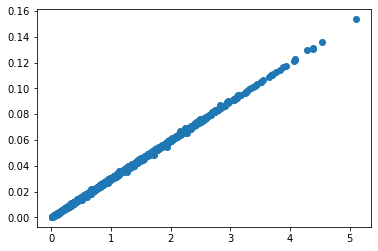

In [63]:
plt.scatter(x,y)

In [64]:
df_merged.to_csv(data_path + "ecol_TE_thingy.csv")